In [ ]:
# test code lang to to clean the data frame
# cleaned the price column para ready na for imputation

import pandas as pd
import re
import numpy as np
seldf = pd.read_csv('seldf_03_26_21.csv')
bsdf = pd.read_csv('bsdf_12_53_44.csv')
df = bsdf.merge(seldf, on = 'title')

# Data Cleanup

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [ ]:
#drop the first column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 0 to 939
Data columns (total 16 columns):
Unnamed: 0_x         940 non-null int64
title                940 non-null object
price                235 non-null object
hotelClass           940 non-null float64
rating               758 non-null float64
totalRev             760 non-null object
excellentRev         757 non-null object
verygoodRev          757 non-null float64
averageRev           757 non-null float64
poorRev              757 non-null float64
terribleRev          757 non-null float64
nearbyRestaurant     783 non-null float64
nearbyAttractions    783 non-null float64
Unnamed: 0_y         940 non-null int64
amenities            940 non-null object
roomfeatures         940 non-null object
dtypes: float64(8), int64(2), object(6)
memory usage: 124.8+ KB


In [ ]:
df.drop_duplicates(subset='title',keep=False,inplace=True)

In [ ]:
df.head()

,Unnamed: 0_x,title,price,hotelClass,rating,totalRev,excellentRev,verygoodRev,averageRev,poorRev,terribleRev,nearbyRestaurant,nearbyAttractions,Unnamed: 0_y,amenities,roomfeatures
12,1,Henann Palm Beach Resort,5893.00,3.0,4.5,273,224,26.0,10.0,5.0,8.0,53.0,5.0,0,"['Complimentary instant cofffee', 'Meeting roo...","['Coffee / tea maker', 'Beach', 'Conference fa..."
13,2,Henann Lagoon Resort,3395.00,4.5,4.5,832,516,231.0,55.0,12.0,18.0,47.0,6.0,1,"['Meeting rooms', 'Swimup bar', 'Free shuttle ...","['Room service', 'Coffee / tea maker', 'Housek..."
14,3,Fridays Boracay,18810.00,4.0,4.0,672,349,195.0,58.0,39.0,31.0,56.0,10.0,2,"['Complimentary instant cofffee', 'Beach', 'Co...","['Hair dryer', 'Cable / satellite TV', 'Electr..."
15,4,Two Seasons Boracay Resort,5666.00,4.0,4.0,614,280,234.0,71.0,9.0,20.0,24.0,5.0,3,"['Beach', 'Free High Speed Internet (WiFi)', '...","['Coffee / tea maker', 'Iron', 'Hair dryer', '..."
16,5,Villa Caemilla Beach Boutique Hotel,3471.94,4.0,4.5,983,734,185.0,38.0,12.0,14.0,31.0,2.0,4,"['Complimentary instant cofffee', 'Fax / photo...","['Coffee / tea maker', 'Fax / photocopying', '..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254 entries, 12 to 352
Data columns (total 16 columns):
Unnamed: 0_x         254 non-null int64
title                254 non-null object
price                254 non-null float64
hotelClass           254 non-null float64
rating               235 non-null float64
totalRev             235 non-null object
excellentRev         234 non-null object
verygoodRev          234 non-null float64
averageRev           234 non-null float64
poorRev              234 non-null float64
terribleRev          234 non-null float64
nearbyRestaurant     213 non-null float64
nearbyAttractions    213 non-null float64
Unnamed: 0_y         254 non-null int64
amenities            254 non-null object
roomfeatures         254 non-null object
dtypes: float64(9), int64(2), object(5)
memory usage: 33.7+ KB


In [ ]:
#Boxplot Distribution of Hotel Prices
import plotly.express as px
fig = px.box(df, y = 'price')
fig.update_layout(
    title="Hotel Prices",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="black"
    )
)
fig.show()

In [ ]:
# IMPUTING THE MISSING PRICE VALUES
#convert the price column to string
df['price'] = df['price'].astype(str)
#remove ₱ sign
df['price'] = df['price'].str.replace(r'₱', '')
df['price'] = df['price'].str.replace(r',', '')
df['price'] = df['price'].str.replace(r'nan', '')
# make float
df['price'] = pd.to_numeric(df['price'])
# IMPUTE MISSING VALUES
# insert code here (bukas na magiimpute pag may complete dataset na)
df_MeanPrice = df['price'].mean()
df['price'] = df['price'].fillna(df_MeanPrice)
df['price'] = round(df['price'],2)
df.head()

,Unnamed: 0_x,title,price,hotelClass,rating,totalRev,excellentRev,verygoodRev,averageRev,poorRev,terribleRev,nearbyRestaurant,nearbyAttractions,Unnamed: 0_y,amenities,roomfeatures
12,1,Henann Palm Beach Resort,5893.00,3.0,4.5,273,224,26.0,10.0,5.0,8.0,53.0,5.0,0,"['Complimentary instant cofffee', 'Meeting roo...","['Coffee / tea maker', 'Beach', 'Conference fa..."
13,2,Henann Lagoon Resort,3395.00,4.5,4.5,832,516,231.0,55.0,12.0,18.0,47.0,6.0,1,"['Meeting rooms', 'Swimup bar', 'Free shuttle ...","['Room service', 'Coffee / tea maker', 'Housek..."
14,3,Fridays Boracay,18810.00,4.0,4.0,672,349,195.0,58.0,39.0,31.0,56.0,10.0,2,"['Complimentary instant cofffee', 'Beach', 'Co...","['Hair dryer', 'Cable / satellite TV', 'Electr..."
15,4,Two Seasons Boracay Resort,5666.00,4.0,4.0,614,280,234.0,71.0,9.0,20.0,24.0,5.0,3,"['Beach', 'Free High Speed Internet (WiFi)', '...","['Coffee / tea maker', 'Iron', 'Hair dryer', '..."
16,5,Villa Caemilla Beach Boutique Hotel,3471.94,4.0,4.5,983,734,185.0,38.0,12.0,14.0,31.0,2.0,4,"['Complimentary instant cofffee', 'Fax / photo...","['Coffee / tea maker', 'Fax / photocopying', '..."


In [ ]:
# Drop TotalRev and Unnamed: 0_x
df.drop(columns=['totalRev', 'Unnamed: 0_x'])

,title,price,hotelClass,rating,excellentRev,verygoodRev,averageRev,poorRev,terribleRev,nearbyRestaurant,nearbyAttractions,Unnamed: 0_y,amenities,roomfeatures
12,Henann Palm Beach Resort,5893.00,3.0,4.5,224,26.0,10.0,5.0,8.0,53.0,5.0,0,"['Complimentary instant cofffee', 'Meeting roo...","['Coffee / tea maker', 'Beach', 'Conference fa..."
13,Henann Lagoon Resort,3395.00,4.5,4.5,516,231.0,55.0,12.0,18.0,47.0,6.0,1,"['Meeting rooms', 'Swimup bar', 'Free shuttle ...","['Room service', 'Coffee / tea maker', 'Housek..."
14,Fridays Boracay,18810.00,4.0,4.0,349,195.0,58.0,39.0,31.0,56.0,10.0,2,"['Complimentary instant cofffee', 'Beach', 'Co...","['Hair dryer', 'Cable / satellite TV', 'Electr..."
15,Two Seasons Boracay Resort,5666.00,4.0,4.0,280,234.0,71.0,9.0,20.0,24.0,5.0,3,"['Beach', 'Free High Speed Internet (WiFi)', '...","['Coffee / tea maker', 'Iron', 'Hair dryer', '..."
16,Villa Caemilla Beach Boutique Hotel,3471.94,4.0,4.5,734,185.0,38.0,12.0,14.0,31.0,2.0,4,"['Complimentary instant cofffee', 'Fax / photo...","['Coffee / tea maker', 'Fax / photocopying', '..."
25,Surfside Boracay Resort & Spa,1672.00,3.0,4.5,182,102.0,14.0,4.0,3.0,21.0,2.0,6,"['Fax / photocopying', 'Beach', 'Free High Spe...","['Room service', 'Housekeeping', 'Private beac..."
26,357 Boracay,3759.00,3.0,4.5,104,26.0,9.0,1.0,5.0,23.0,2.0,7,"['Free breakfast', 'Special diet menus', 'Fax ...","['Safe', 'Private balcony', 'Flatscreen TV', '..."
27,Boracay Amor Apartments,3757.00,3.0,4.0,30,15.0,3.0,4.0,2.0,28.0,6.0,8,"['Horseback riding', 'Outdoor furniture', 'Fre...","['Safe', 'Refrigerator', 'Air conditioning', '..."
28,Luxx Boutique Boracay,2624.00,3.0,4.0,7,8.0,2.0,0.0,2.0,55.0,5.0,9,"['Complimentary instant cofffee', 'Fax / photo...","['Iron', 'Hair dryer', 'Cable / satellite TV',..."
29,Shore Time Hotel Boracay,3246.00,3.0,4.5,88,59.0,11.0,5.0,6.0,51.0,7.0,10,"['Free breakfast', 'Beach', 'Golf course', 'Co...","['Housekeeping', 'Bath / shower', 'Safe', 'Hai..."


In [ ]:
#Change 4.5-Star Hotel Class to 5-Star Hotel Class
df['hotelClass'] = df['hotelClass'].replace(4.5, 5.0)

In [ ]:
#Number of Amenities and RoomFeatures

# NEW COLUMN: # of room features and amenities
df['# Room Amenities'] = [len(i.split(',')) for i in df['amenities']]
df['# Room Features'] = [len(i.split(',')) for i in df['roomfeatures']]

#Replace empty list(len = 1) to len = 0
df['# Room Amenities'] = df['# Room Amenities'].replace(1,0)
df['# Room Features'] = df['# Room Features'].replace(1,0)

In [ ]:
#BINARIZING HOTEL AMENITIES AND ROOM FEATURES LISTED IN TRIP ADVISOR

#CLEANING THE AMENITIES AND ROOM FEATURES TO REMOVE [, ] and '
df['amenities'] = df['amenities'].str.replace(r'[', '')
df['amenities'] = df['amenities'].str.replace(r']', '')
df['amenities'] = df['amenities'].str.replace(r'\'', '')
df['roomfeatures'] = df['roomfeatures'].str.replace(r'[', '')
df['roomfeatures'] = df['roomfeatures'].str.replace(r']', '')
df['roomfeatures'] = df['roomfeatures'].str.replace(r'\'', '')
# NEW COLUMN: AMENITIES AND ROOM FEATURES IN LIST FORM

df['amenities list'] = [i.split(',') for i in df['amenities']]
df['room features list'] = [i.split(',') for i in df['roomfeatures']]
# converting into list the amenities list
df['amenities list'] = df['amenities list'].apply(lambda x: list(x))
# converting into list the room features list
df['room features list'] = df['room features list'].apply(lambda x: list(x))

# BINARY REPRESENTATION (AMENITIES LIST)

from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

a = pd.DataFrame(mlb.fit_transform(df['amenities list']),columns=mlb.classes_, index=df.index)
newdataframe=pd.merge(df,a,left_index=True,right_index=True) #merging original df and df with amenities in binary form
mlb = MultiLabelBinarizer()
b = pd.DataFrame(mlb.fit_transform(df['room features list']),columns=mlb.classes_, index=df.index)
finaldf=pd.merge(newdataframe,b,left_index=True,right_index=True) #merging new df and df with room features in binary form

finaldf.head() # VARIABLE NAME WITH BINARY REPRESENTATIONS

,Unnamed: 0_x,title,price,hotelClass,rating,totalRev,excellentRev,verygoodRev,averageRev,poorRev,...,Microwave,Private balcony,Private bathrooms,Private beach,Refrigerator,Room service,Safe,Seating area,Telephone,Wake-up service / alarm clock
12,1,Henann Palm Beach Resort,5893.00,3.0,4.5,273,224,26.0,10.0,5.0,...,0,0,0,0,0,0,0,0,0,0
13,2,Henann Lagoon Resort,3395.00,5.0,4.5,832,516,231.0,55.0,12.0,...,0,0,0,0,0,1,0,0,0,0
14,3,Fridays Boracay,18810.00,4.0,4.0,672,349,195.0,58.0,39.0,...,0,0,0,0,0,0,0,0,0,0
15,4,Two Seasons Boracay Resort,5666.00,4.0,4.0,614,280,234.0,71.0,9.0,...,0,0,0,0,0,0,0,0,0,0
16,5,Villa Caemilla Beach Boutique Hotel,3471.94,4.0,4.5,983,734,185.0,38.0,12.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
finaldf['excellentRev'] = finaldf.excellentRev.astype(str).replace(',','')

In [ ]:
finaldf.excellentRev.fillna(finaldf.excellentRev.median()) 

TypeError: could not convert string to float: '2,511'

In [ ]:
finaldf.excellentRev.fillna(finaldf.excellentRev.median()) 

TypeError: could not convert string to float: '2,511'

In [ ]:
finaldf 

,Unnamed: 0_x,title,price,hotelClass,rating,totalRev,excellentRev,verygoodRev,averageRev,poorRev,...,Microwave,Private balcony,Private bathrooms,Private beach,Refrigerator,Room service,Safe,Seating area,Telephone,Wake-up service / alarm clock
12,1,Henann Palm Beach Resort,5893.00,3.0,4.5,273,224,26.0,10.0,5.0,...,0,0,0,0,0,0,0,0,0,0
13,2,Henann Lagoon Resort,3395.00,5.0,4.5,832,516,231.0,55.0,12.0,...,0,0,0,0,0,1,0,0,0,0
14,3,Fridays Boracay,18810.00,4.0,4.0,672,349,195.0,58.0,39.0,...,0,0,0,0,0,0,0,0,0,0
15,4,Two Seasons Boracay Resort,5666.00,4.0,4.0,614,280,234.0,71.0,9.0,...,0,0,0,0,0,0,0,0,0,0
16,5,Villa Caemilla Beach Boutique Hotel,3471.94,4.0,4.5,983,734,185.0,38.0,12.0,...,0,0,0,0,0,0,0,0,0,0
25,8,Surfside Boracay Resort & Spa,1672.00,3.0,4.5,305,182,102.0,14.0,4.0,...,0,0,0,0,0,1,0,0,0,0
26,9,357 Boracay,3759.00,3.0,4.5,145,104,26.0,9.0,1.0,...,0,0,0,0,0,0,1,0,0,0
27,10,Boracay Amor Apartments,3757.00,3.0,4.0,54,30,15.0,3.0,4.0,...,0,0,0,0,0,0,1,0,0,0
28,11,Luxx Boutique Boracay,2624.00,3.0,4.0,19,7,8.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
29,12,Shore Time Hotel Boracay,3246.00,3.0,4.5,169,88,59.0,11.0,5.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Drop TotalRev and Unnamed
finaldf.drop(columns=['totalRev', 'Unnamed: 0_x'])
len(finaldf)

254

In [ ]:
finaldf.head()

,Unnamed: 0_x,title,price,hotelClass,rating,totalRev,excellentRev,verygoodRev,averageRev,poorRev,...,Microwave,Private balcony,Private bathrooms,Private beach,Refrigerator,Room service,Safe,Seating area,Telephone,Wake-up service / alarm clock
12,1,Henann Palm Beach Resort,5893.00,3.0,4.5,273,224,26.0,10.0,5.0,...,0,0,0,0,0,0,0,0,0,0
13,2,Henann Lagoon Resort,3395.00,5.0,4.5,832,516,231.0,55.0,12.0,...,0,0,0,0,0,1,0,0,0,0
14,3,Fridays Boracay,18810.00,4.0,4.0,672,349,195.0,58.0,39.0,...,0,0,0,0,0,0,0,0,0,0
15,4,Two Seasons Boracay Resort,5666.00,4.0,4.0,614,280,234.0,71.0,9.0,...,0,0,0,0,0,0,0,0,0,0
16,5,Villa Caemilla Beach Boutique Hotel,3471.94,4.0,4.5,983,734,185.0,38.0,12.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(min(finaldf.price),max(finaldf.price))

850.0 29464.0


In [ ]:
finaldf2 = finaldf.groupby(['hotelClass'])['price'].mean()
finaldf2

hotelClass
0.0    3317.895636
2.0    2638.937429
3.0    3439.283516
4.0    4621.699286
5.0    7227.988000
Name: price, dtype: float64

In [ ]:
import matplotlib.pyplot as plt

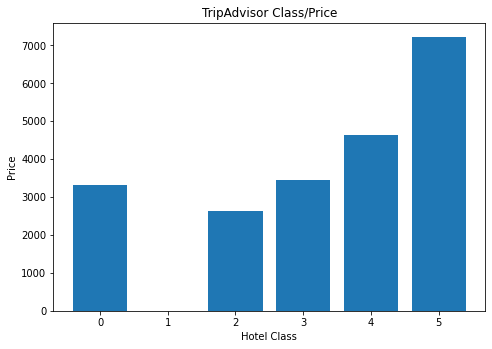

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
hotelClass = [0.0,2.0,3.0,4.0,5.0]
price = [3317.89,2638.94,3439.28,4621.70,7227.99]
plt.xlabel('Hotel Class')
plt.ylabel('Price')
plt.title('TripAdvisor Class/Price')
ax.bar(hotelClass,price)
plt.show()

In [ ]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns F and P-value
fvalue, pvalue = stats.f_oneway(finaldf['price'], finaldf['hotelClass'])
print(fvalue, pvalue)

434.8531957841809 3.675358596178752e-70


In [ ]:
#string data - amenities 
from statsmodels.formula.api import ols
#tips = sns.load_dataset("price")
model = ols('price ~ hotelClass + rating + poorRev + nearbyRestaurant + nearbyAttractions', data=finaldf)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     6.903
Date:                Sat, 23 May 2020   Prob (F-statistic):           5.93e-06
Time:                        08:23:36   Log-Likelihood:                -1800.0
No. Observations:                 200   AIC:                             3612.
Df Residuals:                     194   BIC:                             3632.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           504.8766    876.490      0.576      0.565   -1223.796    2233.549
hotelClass          320.4366    106.494      3.009      0.003     110.402     530.471
rating              547.3845    221.470      2.472      0.014     110.586     984.183
poorRev              19.2918      7.408      2.604      0.010       4.680      33.903
nearbyRestaurant     -9.2086      4.450     -2.069      0.040     -17.985      -0.432
nearbyAttractions    54.5849     30.622      1.783      0.076      -5.809     114.979
==============================================================================
Omnibus:                      145.611   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1736.230
Skew:                           2.655   Prob(JB):                         0.00
Kurtosis:                      16.422   Cond. No.                         604.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
forreg = finaldf.copy()

In [ ]:
#string data - amenities 
from statsmodels.formula.api import ols
#tips = sns.load_dataset("price")
model = ols("price ~ hotelClass + rating + poorRev + nearbyRestaurant + roomFeats + roomAmenities", data=finaldf.rename(columns= {
    '# Room Features': 'roomFeats',
    '# Room Amenities': 'roomAmenities'
}))
fitted_model = model.fit()
fitted_model.summary()
#findme

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     9.498
Date:                Sat, 23 May 2020   Prob (F-statistic):           4.06e-08
Time:                        08:32:34   Log-Likelihood:                -1794.5
No. Observations:                 200   AIC:                             3601.
Df Residuals:                     194   BIC:                             3621.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          740.4253    852.466      0.869      0.386    -940.865    2421.716
hotelClass         198.7717    108.315      1.835      0.068     -14.854     412.397
rating             372.9363    221.709      1.682      0.094     -64.334     810.206
poorRev              9.0021      7.728      1.165      0.245      -6.239      24.243
nearbyRestaurant    -1.9584      2.229     -0.879      0.381      -6.354       2.437
roomFeats           23.3101      6.148      3.791      0.000      11.184      35.436
roomAmenities       23.3101      6.148      3.791      0.000      11.184      35.436
==============================================================================
Omnibus:                      141.127   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1659.823
Skew:                           2.543   Prob(JB):                         0.00
Kurtosis:                      16.165   Cond. No.                     2.22e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.69e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Heat Map

price , hotel class, rating , # of resto number of  attra

In [ ]:
corr = finaldf[['price','hotelClass','rating', '# Room Amenities', '# Room Features',  'verygoodRev',]].corr()

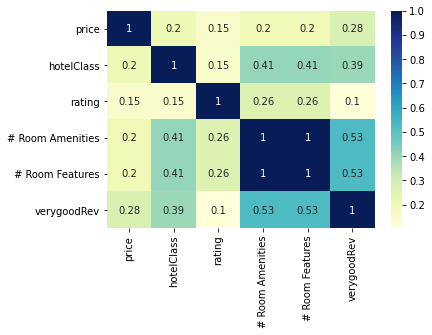

In [ ]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap="YlGnBu", annot = True) 

In [ ]:
corr3 = finaldf[['price','hotelClass','rating', '# Room Amenities', '# Room Features',  'excellentRev',]].corr()

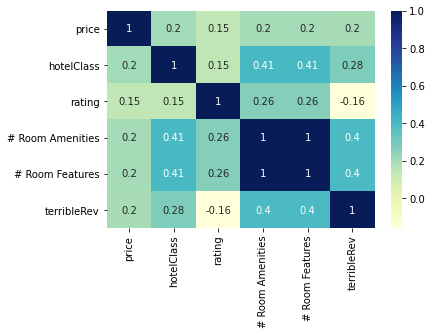

In [ ]:
sns.heatmap(corr3, 
        xticklabels=corr3.columns,
        yticklabels=corr3.columns, cmap="YlGnBu", annot = True) 

In [ ]:
~(finaldf.excellentRev.isna())

12      True
13      True
14      True
15      True
16      True
       ...  
348    False
349    False
350    False
351    False
352    False
Name: excellentRev, Length: 254, dtype: bool

In [ ]:
corr = finaldf[~(finaldf.excellentRev.isna())][['price','hotelClass','rating', '# Room Amenities', '# Room Features',  'excellentRev']].corr()

In [ ]:
dfexRevnona = finaldf[~(finaldf.excellentRev.isna())] 

In [ ]:
finaldf.excellentRev.dtype

dtype('O')

In [ ]:
dfexRevnona[['price','hotelClass','rating', '# Room Amenities', '# Room Features',  'excellentRev']].corr()

,price,hotelClass,rating,# Room Amenities,# Room Features
price,1.000000,0.254095,0.152844,0.363683,0.363683
hotelClass,0.254095,1.000000,0.158045,0.415464,0.415464
rating,0.152844,0.158045,1.000000,0.264449,0.264449
# Room Amenities,0.363683,0.415464,0.264449,1.000000,1.000000
# Room Features,0.363683,0.415464,0.264449,1.000000,1.000000


In [ ]:
corr2 =  finaldf[~(finaldf.excellentRev.isna())][['price','hotelClass','rating', '# Room Amenities']].corr()

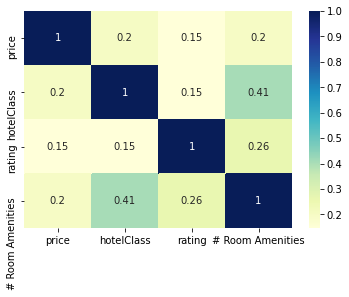

In [ ]:
sns.heatmap(corr2, 
        xticklabels=corr2.columns,
        yticklabels=corr2.columns, cmap="YlGnBu", annot = True) 

## Top

In [ ]:
finaldf.head()

,Unnamed: 0_x,title,price,hotelClass,rating,totalRev,excellentRev,verygoodRev,averageRev,poorRev,...,Microwave,Private balcony,Private bathrooms,Private beach,Refrigerator,Room service,Safe,Seating area,Telephone,Wake-up service / alarm clock
12,1,Henann Palm Beach Resort,5893.00,3.0,4.5,273,224,26.0,10.0,5.0,...,0,0,0,0,0,0,0,0,0,0
13,2,Henann Lagoon Resort,3395.00,5.0,4.5,832,516,231.0,55.0,12.0,...,0,0,0,0,0,1,0,0,0,0
14,3,Fridays Boracay,18810.00,4.0,4.0,672,349,195.0,58.0,39.0,...,0,0,0,0,0,0,0,0,0,0
15,4,Two Seasons Boracay Resort,5666.00,4.0,4.0,614,280,234.0,71.0,9.0,...,0,0,0,0,0,0,0,0,0,0
16,5,Villa Caemilla Beach Boutique Hotel,3471.94,4.0,4.5,983,734,185.0,38.0,12.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
[i for i in finaldf.columns]

['Unnamed: 0_x',
 'title',
 'price',
 'hotelClass',
 'rating',
 'totalRev',
 'excellentRev',
 'verygoodRev',
 'averageRev',
 'poorRev',
 'terribleRev',
 'nearbyRestaurant',
 'nearbyAttractions',
 'Unnamed: 0_y',
 'amenities',
 'roomfeatures',
 '# Room Amenities',
 '# Room Features',
 'amenities list',
 'room features list',
 '_x',
 ' "Childrens playground"',
 ' "Childrens television networks"_x',
 ' "Kids meals"',
 ' "Kids outdoor play equipment"',
 ' 24-hour check-in_x',
 ' 24-hour front desk_x',
 ' 24-hour security_x',
 ' ATM on site',
 ' Adult pool',
 ' Aerobics_x',
 ' Airport transportation_x',
 ' BBQ facilities',
 ' Babysitting_x',
 ' Baggage storage_x',
 ' Banquet room_x',
 ' Bar / lounge_x',
 ' Beach_x',
 ' Bicycle rental_x',
 ' Bicycle tours_x',
 ' Billiards_x',
 ' Board games / puzzles',
 ' Boating_x',
 ' Body wrap',
 ' Books_x',
 ' Breakfast available_x',
 ' Breakfast buffet',
 ' Breakfast in the room_x',
 ' Business Center with Internet Access_x',
 ' Butler service',
 ' Cano

In [ ]:
finaldf.sort_values(by = 'terribleRev',ascending = False ).head(3)[['title','terribleRev']]

,title,terribleRev
186,La Carmela de Boracay,208.0
156,Fairways & Bluewater Boracay,186.0
129,Henann Regency Resort & Spa,109.0


In [ ]:
finaldf.excellentRev.str.len().value_counts()

2.0    95
1.0    91
3.0    44
5.0     4
Name: excellentRev, dtype: int64

In [ ]:
finaldf[finaldf.excellentRev.str.len() == 5].sort_values(by = 'excellentRev', ascending = False ).head(3)[['title','excellentRev']]

,title,excellentRev
85,Shangri-La's Boracay Resort & Spa,"2,511"
156,Fairways & Bluewater Boracay,"1,785"
153,Discovery Shores,"1,610"
